# Simple_Linear Regression_Height_Weight_Data_Set





- Target from the dataset to predict weight, to do this we will make it simple for beginner and use different models to predict price begin with Simple Linear Regression the model to get better results.

- In this Data Sat 3 Indepedent Variables and 1 Dependent Variables

- Colum name - id, gender, weight, height

- pridected and target Variables - weight

- Simple Linear Regresion

- Multible Linear Regression

- My Model Accuracy are 73% that is the good model 


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing height weight csv
df = pd.read_csv('/Users/chetansingh/Downloads/Shubham/Data Science/08_Linear_Regression/Height_Weight.csv')
df

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
...,...,...,...,...
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185


In [4]:
df.head()

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [5]:
df.tail()

,id,gender,weight,height
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185
198,21,M,99,180


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [7]:
df.describe()

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [8]:
df.notnull

<bound method DataFrame.notnull of       id gender  weight  height
0     29      F      39     157
1    182      F      43     154
2    130      F      44     157
3    104      F      45     163
4    128      F      45     157
..   ...    ...     ...     ...
194   65      M      97     189
195   30      M     101     183
196   54      M     102     185
197   97      M     103     185
198   21      M      99     180

[199 rows x 4 columns]>

In [9]:
df.shape

(199, 4)

In [10]:
df.size

796

In [11]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       id gender  weight  height
0     29      F      39     157
1    182      F      43     154
2    130      F      44     157
3    104      F      45     163
4    128      F      45     157
..   ...    ...     ...     ...
194   65      M      97     189
195   30      M     101     183
196   54      M     102     185
197   97      M     103     185
198   21      M      99     180

[199 rows x 4 columns]>

In [12]:
#Statistical Information about Categorical Columns
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [13]:
#Dropping "id" column as it is unique identification for each row
df.drop(['id'], axis = 1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [14]:
df.shape

(199, 3)

In [15]:
# Finding missing values in df
df.isnull()

,gender,weight,height
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
194,False,False,False
195,False,False,False
196,False,False,False
197,False,False,False


In [16]:
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

Univariate Analysis

In [17]:
#Frequency Matrix of 'Gender' column
df['gender'].value_counts()

F    111
M     88
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

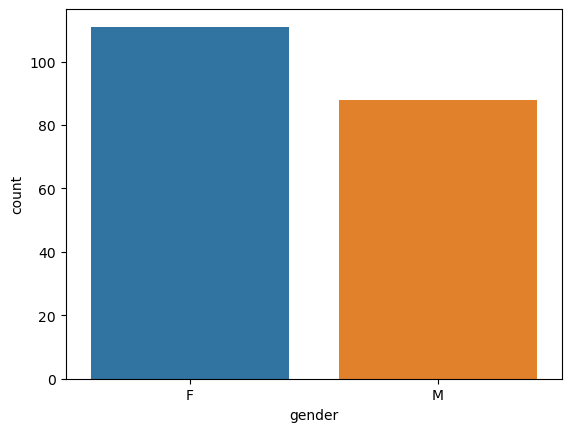

In [18]:
#Bar chart of frequency count (for Male & Female)
sns.countplot(x = 'gender' , data = df)

<Axes: xlabel='height', ylabel='weight'>

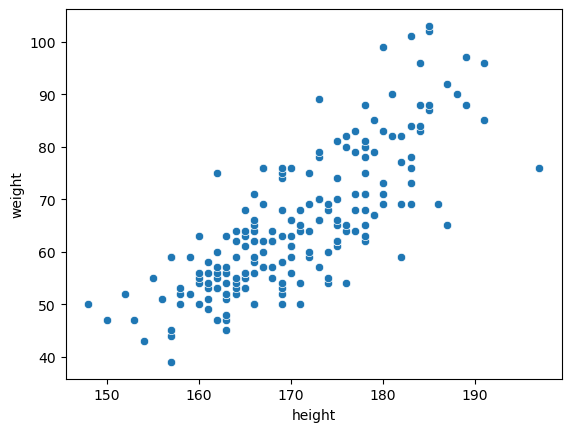

In [28]:
#Looking at the scatter plot between "weight" & 'height'
sns.scatterplot(data=df, x='height', y='weight')


In [27]:
#Finding Correlation Coeficient betweeen weight and height
df.corr()

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_9554/725866436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


<Axes: xlabel='height', ylabel='gender'>

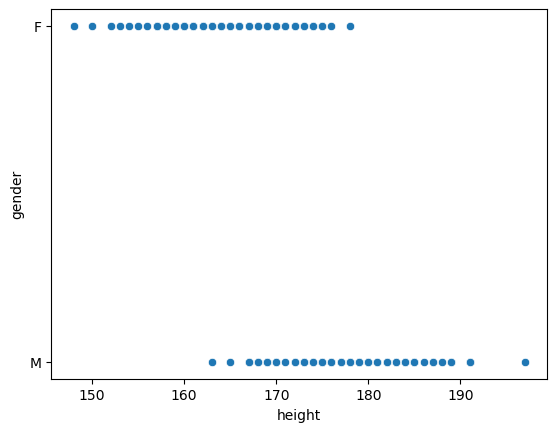

In [29]:
sns.scatterplot(data=df, x='height',y='gender' )

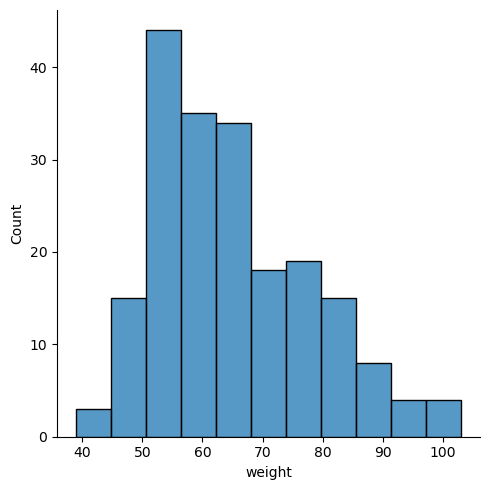

In [30]:
#Distribution Plot for "weight"
sns.displot(df['weight'],kind='hist')

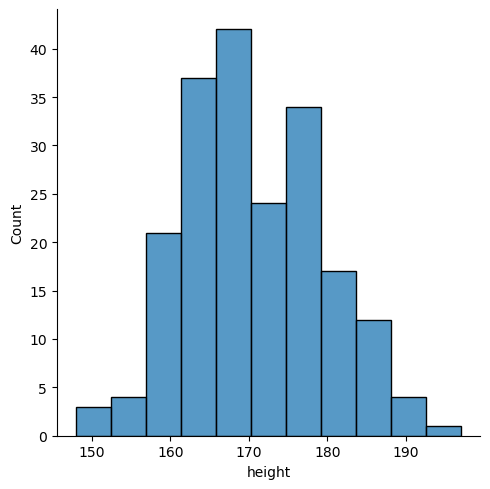

In [33]:
#Distribution Plot for "height" column
sns.displot(df.height,kind='hist')

In [34]:
#Skew in the distribution of 'weight' column
df['weight'].skew() #Moderately Skewed

0.7449402052268245

In [36]:
#Skew in the distribution of 'height' column
df['height'].skew() #Almost Symmetric

0.2129090698591845

Text(0.5, 1.0, 'Boxplot of Height')

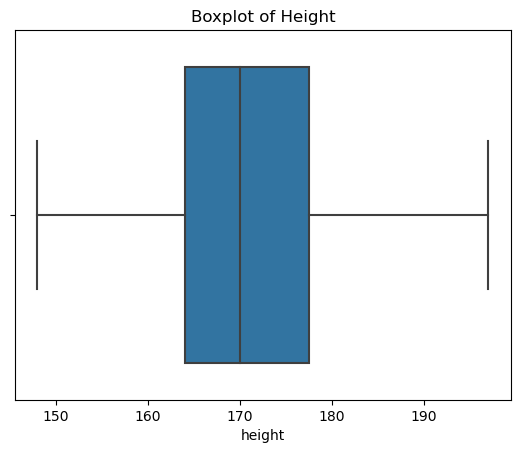

In [46]:
sns.boxplot(x=df['height'])
plt.title("Boxplot of Height")


Text(0.5, 1.0, 'Boxplot of weight')

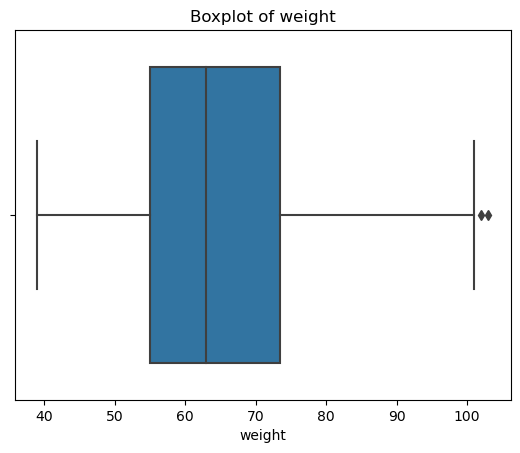

In [43]:
sns.boxplot(x=df['weight'])
plt.title("Boxplot of weight")

In [44]:
#Assigning Independent Variable "height" as 'X'
X=df['height']
X

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [47]:
#Assigning Dependent Variable "weight" as 'y'
y=df['weight']
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Plotting Best Fit Line Using np.polyfit

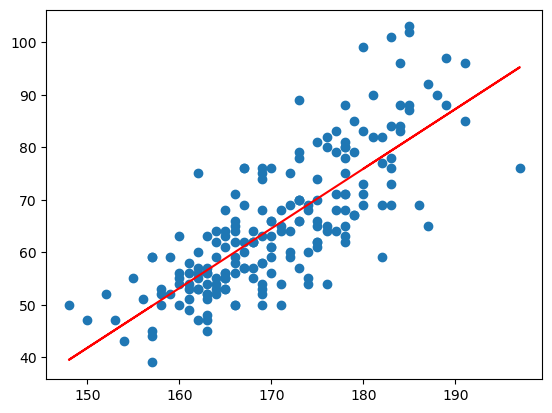

In [48]:
#To Plot a Linear Regression (Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(X,y)
m,b = np.polyfit(X, y, 1) #m = slope, b=intercept
plt.plot(X, m*X + b,'r') #We plot X & equation (m*X+b)

Creation of dummy variables

In [49]:
#Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()


['weight', 'height']

In [51]:
df.head(5)

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157


In [54]:
#Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()

['weight', 'height']

In [55]:
#Creating df of Numeric columns
df_num = df[['weight','height']]
df_num

,weight,height
0,39,157
1,43,154
2,44,157
3,45,163
4,45,157
...,...,...
194,97,189
195,101,183
196,102,185
197,103,185


In [56]:
#Create a list of categorical variables
df.select_dtypes(include=['object']).columns.tolist()

['gender']

In [62]:
#Convert "gender" column to "numeric" data using get_dummies
df_dummies = pd.get_dummies(df['gender'])

In [66]:
df_dummies.tail(3)

,F,M
196,0,1
197,0,1
198,0,1


In [67]:
#combined column wise, appending of columns
df_combined = pd.concat([df_num, df_dummies], axis=1)

In [68]:
df_combined

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0
...,...,...,...,...
194,97,189,0,1
195,101,183,0,1
196,102,185,0,1
197,103,185,0,1


In [74]:
#Modified Data set 
df_combined.head()

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0


In [75]:
#Modified Data set 
df_combined.tail()

,weight,height,F,M
194,97,189,0,1
195,101,183,0,1
196,102,185,0,1
197,103,185,0,1
198,99,180,0,1


In [76]:
#Find Missing Values
df_combined.isnull().sum(axis = 0)

weight    0
height    0
F         0
M         0
dtype: int64

In [79]:
# Putting feature variable to X (ie X = Dataset after removing Interest Rate)
X = df_combined.drop('weight', axis= 1)

In [81]:
# Putting response variable to y pridect the value
y = df_combined['weight']

In [85]:
X

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [86]:
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Splitting the data in Training and Test set Using sklearn we split 70% of our data into training set and rest in test set. Setting random_state will give the same training and test set everytime on running the code.

In [181]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=10)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((159, 3), (159,), (40, 3), (40,))

Performing Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [184]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

 Model Evaluation

In [185]:
# print the intercept
print(lm.intercept_)

-76.69405657864999


In [186]:
# print the intercept
print(lm.coef_)

[ 0.83455583 -4.02723369  4.02723369]


In [187]:
X

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [188]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,0.834556
F,-4.027234
M,4.027234


In [189]:
# Making predictions using the model
y_pred = lm.predict(X_test)
print(y_pred)

[52.80764201 55.31130949 49.4694187  76.7186701  54.47675366 55.31130949
 79.22233758 55.31130949 57.81497697 50.30397453 55.31130949 53.64219784
 50.30397453 80.05689341 86.73334003 55.31130949 61.98775611 51.97308618
 77.55322593 83.39511672 68.37311184 61.98775611 54.47675366 69.20766766
 56.98042114 73.3804468  75.88411428 47.80030705 56.14586532 75.88411428
 85.06422837 64.49142359 61.15320028 65.32597941 51.13853036 57.81497697
 75.88411428 80.05689341 48.63486288 79.22233758]


In [190]:
#Model Performance Metrics
#Coefficient of Determination (R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared

0.739253014830711

In [191]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 39.96925348913739
Root_Mean_Squared_Error : 6.322124127944451
r_square_value : 0.739253014830711


In [194]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
59,56,52.807642
5,47,55.311309
20,51,49.469419
124,67,76.718670
52,55,54.476754
19,51,55.311309
161,77,79.222338
55,56,55.311309
69,58,57.814977
2,44,50.303975


                                      Thank you 